# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# from sqlalchemy import create_engine

# Challenge 0 - Import a MySQL table into python:

In this lab, we will twist things up a little. Do you remember your good old friend SQL?
Well, it's time to bring him back and use it in our lab pipeline.

1º- Open the wholesale_customers_data.sql file in MySQL Workbench and run the script into a desired schema.

2º- Create a connection using sqlalchemy from python to mysql and load the table into a variable called *customers*

In [2]:
# using mysql.connector to connect to the database instead of sqlalchemy

import mysql.connector
import getpass # check if needs to be installed

password = getpass.getpass() # this creates a prompt with password visibility to store in the variable.

cnx = mysql.connector.connect(
  host="127.0.0.1", # external is: "ip_address:local_uri". local is: "local_uri". local_uri can be either "localhost" or "127.0.0.1" 
  port="3306", # default is 3306
  database="wholesale", # which db to connect to
  username="root", # default is root on installation, can be changed
  password=password # from private connection
) 

# Verification message
if cnx.is_connected():
    print("Connection to DB established")
else:
    print("Error connecting to DB")

# Run a query to extract the entire dataset
cursor = cnx.cursor()
query = "SELECT * FROM wholesale_customers_data;"  # Query to retrieve all data
cursor.execute(query)
results = cursor.fetchall()

# Extract column names
columns = [desc[0] for desc in cursor.description]

# Load data into a pandas dataframe
wholesale_df = pd.DataFrame(results, columns=columns)
print(wholesale_df.head())

# Close the cursor and connection
cursor.close()
cnx.close()

Connection to DB established
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


# Challenge 1 - Describe the Dataset

Your already loaded dataset contains information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

In case of curiosity, the origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [5]:
# Check for missing data. None.
wholesale_df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
# Descriptive statistics
wholesale_df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [8]:
# Correlation matrix
correlation_matrix = wholesale_df.corr()
correlation_matrix


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


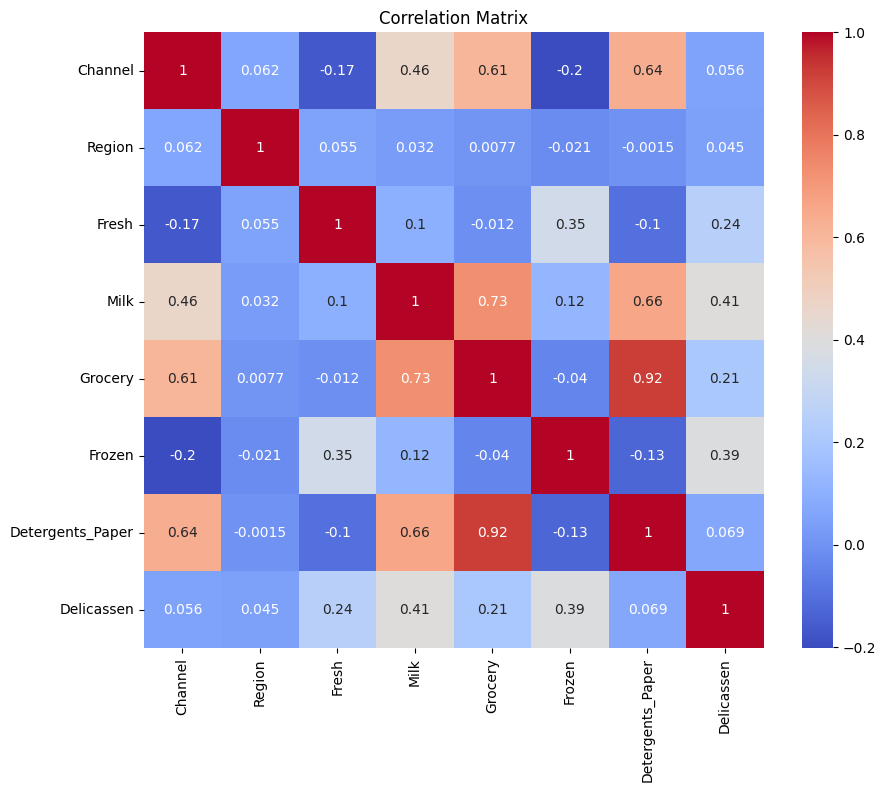

In [ ]:
import seaborn as sns

# Visualization of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Your observations here
# Some features are highly correlated, such as 'Grocery' and 'Detergents_Paper', indicating that customers who buy more groceries also tend to buy more detergents and paper products.

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [12]:
# The data appears to be clean with no missing values



# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [15]:
# Your import here:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

wholesale_scaled = scaler.fit_transform(wholesale_df)

wholesale_scaled_df = pd.DataFrame(wholesale_scaled, columns=wholesale_df.columns)

wholesale_scaled_df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [17]:
from sklearn.cluster import KMeans

# Perform K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust n_clusters as needed
kmeans.fit(wholesale_scaled)

# Assign cluster labels to the original dataset
wholesale_df['labels'] = kmeans.labels_

# Display the updated dataframe
wholesale_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


Count the values in `labels`.

In [19]:
label_counts = wholesale_df['labels'].value_counts()
label_counts


labels
1    200
0    126
3     90
4     14
2     10
Name: count, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [21]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5)
dbscan.fit(wholesale_scaled)

# Assign DBSCAN cluster labels to the original dataset
wholesale_df['labels_DBSCAN'] = dbscan.labels_

# Display the updated dataframe
wholesale_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,0,-1
1,2,3,7057,9810,9568,1762,3293,1776,0,-1
2,2,3,6353,8808,7684,2405,3516,7844,0,-1
3,1,3,13265,1196,4221,6404,507,1788,1,1
4,2,3,22615,5410,7198,3915,1777,5185,0,-1


Count the values in `labels_DBSCAN`.

In [22]:
dbscan_label_counts = wholesale_df['labels_DBSCAN'].value_counts()
dbscan_label_counts


labels_DBSCAN
-1    255
 1    130
 5     22
 4      7
 6      6
 2      5
 3      5
 0      5
 7      5
Name: count, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

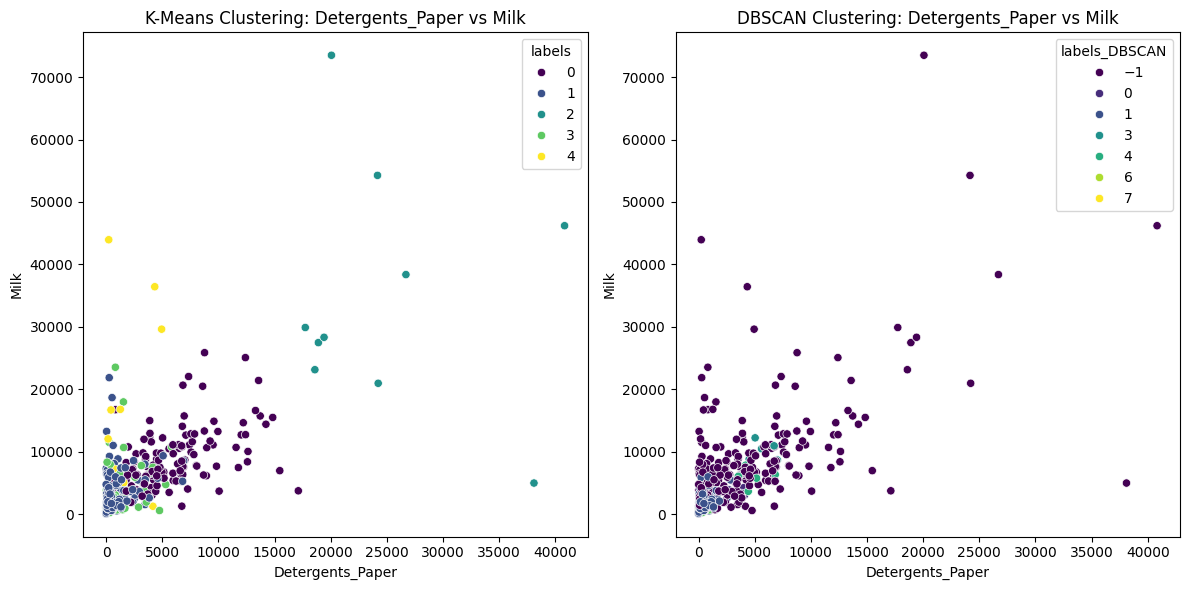

In [26]:
plt.figure(figsize=(12, 6))

# K-Means clustering
plt.subplot(1, 2, 1)
sns.scatterplot(x=wholesale_df['Detergents_Paper'], y=wholesale_df['Milk'], hue=wholesale_df['labels'], palette='viridis')
plt.title('K-Means Clustering: Detergents_Paper vs Milk')
plt.xlabel('Detergents_Paper')
plt.ylabel('Milk')

# DBSCAN clustering
plt.subplot(1, 2, 2)
sns.scatterplot(x=wholesale_df['Detergents_Paper'], y=wholesale_df['Milk'], hue=wholesale_df['labels_DBSCAN'], palette='viridis')
plt.title('DBSCAN Clustering: Detergents_Paper vs Milk')
plt.xlabel('Detergents_Paper')
plt.ylabel('Milk')

plt.tight_layout()
plt.show()

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

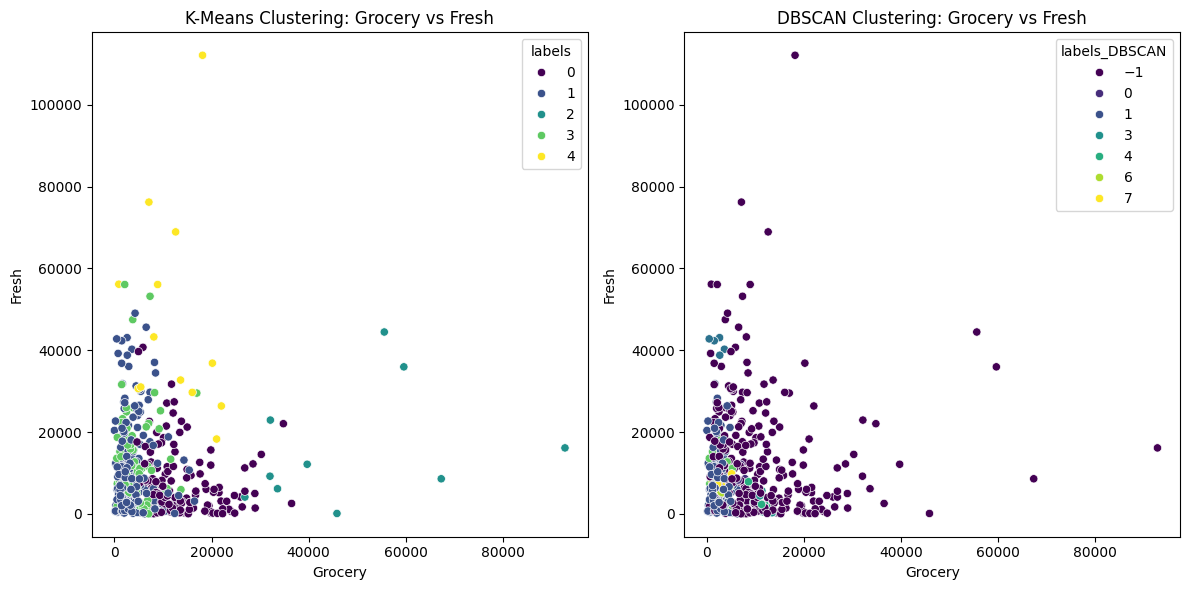

In [27]:
plt.figure(figsize=(12, 6))

# K-Means clustering
plt.subplot(1, 2, 1)
sns.scatterplot(x=wholesale_df['Grocery'], y=wholesale_df['Fresh'], hue=wholesale_df['labels'], palette='viridis')
plt.title('K-Means Clustering: Grocery vs Fresh')
plt.xlabel('Grocery')
plt.ylabel('Fresh')

# DBSCAN clustering
plt.subplot(1, 2, 2)
sns.scatterplot(x=wholesale_df['Grocery'], y=wholesale_df['Fresh'], hue=wholesale_df['labels_DBSCAN'], palette='viridis')
plt.title('DBSCAN Clustering: Grocery vs Fresh')
plt.xlabel('Grocery')
plt.ylabel('Fresh')
plt.tight_layout()
plt.show()


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

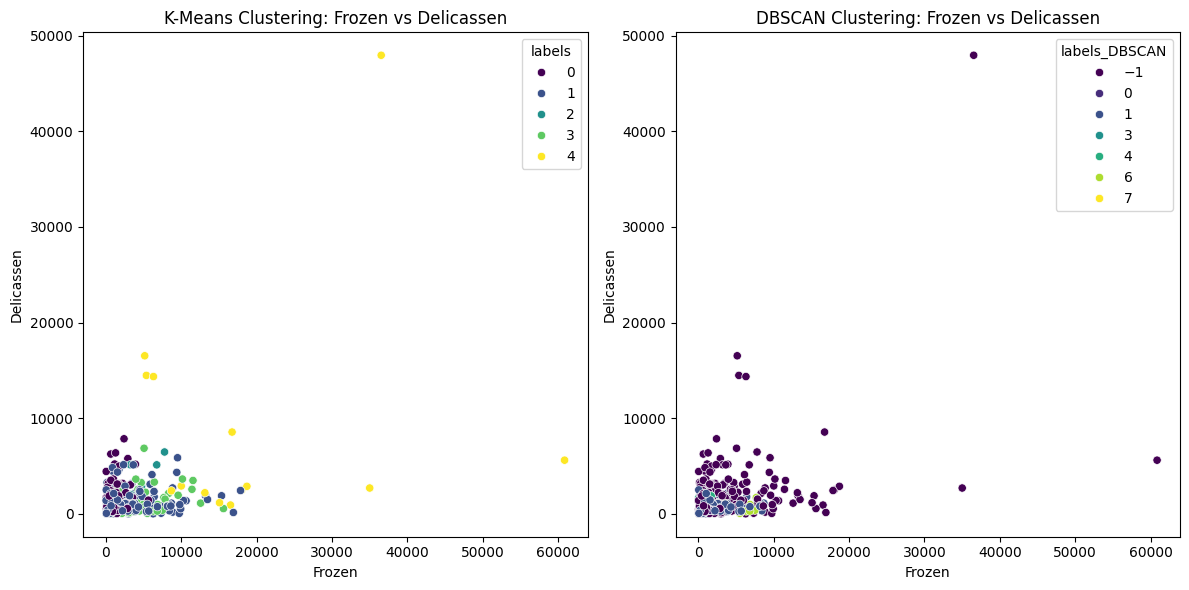

In [ ]:
plt.figure(figsize=(12, 6))

# K-means clustering
plt.subplot(1, 2, 1)
sns.scatterplot(x=wholesale_df['Frozen'], y=wholesale_df['Delicassen'], hue=wholesale_df['labels'], palette='viridis')
plt.title('K-Means Clustering: Frozen vs Delicassen')
plt.xlabel('Frozen')
plt.ylabel('Delicassen')

# DBSCAN clustering
plt.subplot(1, 2, 2)
sns.scatterplot(x=wholesale_df['Frozen'], y=wholesale_df['Delicassen'], hue=wholesale_df['labels_DBSCAN'], palette='viridis')
plt.title('DBSCAN Clustering: Frozen vs Delicassen')
plt.xlabel('Frozen')
plt.ylabel('Delicassen')

plt.tight_layout()
plt.show()

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [30]:
# Group by 'labels' and mean
kmeans_grouped_means = wholesale_df.groupby('labels').mean()
print(kmeans_grouped_means)

# Group by 'labels_DBSCAN' and mean
dbscan_grouped_means = wholesale_df.groupby('labels_DBSCAN').mean()
print(dbscan_grouped_means)


         Channel    Region         Fresh          Milk       Grocery  \
labels                                                                 
0       2.000000  2.674603   8130.031746   8874.071429  14139.150794   
1       1.000000  3.000000  11941.285000   3060.570000   3497.935000   
2       2.000000  2.500000  15964.900000  34708.500000  48536.900000   
3       1.055556  1.311111  11979.055556   3210.777778   4122.411111   
4       1.071429  2.785714  44980.428571  13146.785714  11504.000000   

              Frozen  Detergents_Paper   Delicassen  labels_DBSCAN  
labels                                                              
0        1339.476190       6104.936508  1542.706349      -0.523810  
1        2950.780000        755.690000  1101.195000       0.375000  
2        3054.600000      24875.200000  2942.800000      -1.000000  
3        3288.777778        861.344444  1130.755556       1.377778  
4       19013.142857       1516.000000  8937.642857      -1.000000  
            

Which algorithm appears to perform better?

In [ ]:
# In this case, K-Means produced 5 clusters, while DBSCAN identified noise points and created fewer clusters.
# K-Means clustering seems to provide a clearer separation of clusters, while DBSCAN is more sensitive to noise and may not capture the structure as effectively.

# Bonus Challenge 1 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 2 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here